# Лабораторная работа 2

In [38]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
import shutil
import os

## Пунтк 1

Построить байесовскую решающую границу между классами
Q0 и Q1 двумерных нормально распределенных векторов признаков<br> для случая равных корреляционных матриц и равных
априорных вероятностей и изобразить ее графически. Вычислить вероятности ошибочной классификации и суммарную вероятность ошибочной классификации в этом случае.

<br>Построить минимаксный классификатор и классификатор Неймана-Пирсона для вероятности ошибки первого рода *p0 = 0.05 для двух классов Q0 и Q1 двумерных нормально
распределенных векторов признаков в случае равных корреляционных матриц. Изобразить решающие границы полученных классификаторов графически.<br>

![alt text](image.png)

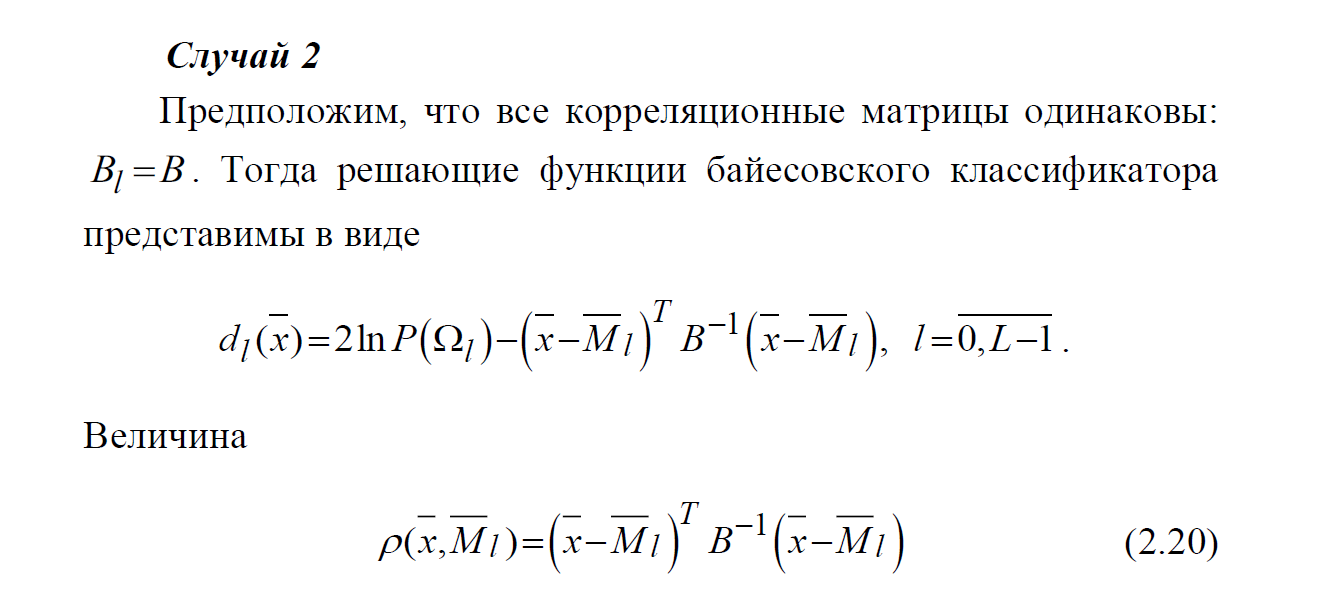

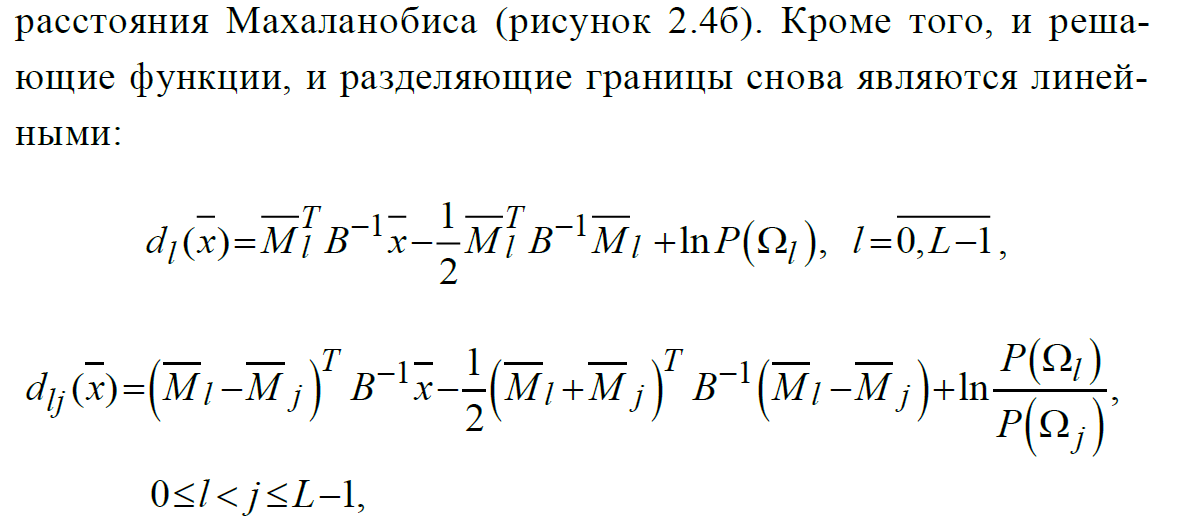

In [39]:
def classBaies(x, B, M1, M2):
    # Омера большое в данном контексте это Q
    # P(Qi) = 0.5, так как 2 множества c одинаковым числом реализайций N
    x1 = np.linspace(min(x[0]), max(x[0]), len(x[0]))
    B_ = np.linalg.inv(B)
    a = (M1 - M2).T @ B_
    b = - 0.5 * (M1 + M2).T @ B_ @ (M1 - M2) + np.log(1)
    #print(a)
    
    x2 = -(a[0][0] * x1 + b) / a[0][1]
    #print(x2)
    return x1, x2, a, b

In [40]:
def classMiniMax(x, B, M1, M2, l):
    x = np.linspace(min(x[0]), max(x[0]),  len(x[0]))

    B_ = np.linalg.inv(B)
    a = (M1 - M2).T @ B_
    b = - 0.5 * (M1 + M2).T @ B_ @ (M1 - M2) + np.log(l)
    
    x2 = -(a[0][0] * x + b) / a[0][1]

    return x, x2

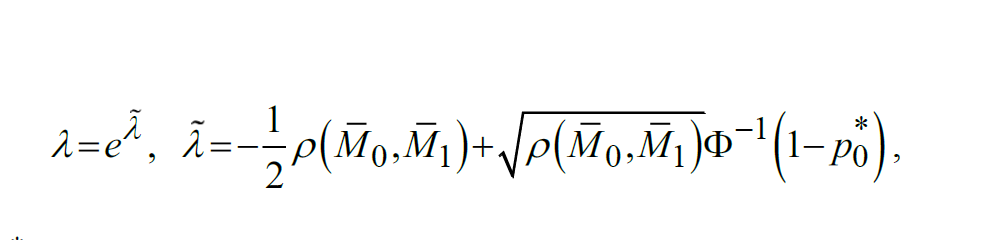

In [41]:
def classNeimanPirson(x, B, M1, M2, p0):
    x1 = np.linspace(min(x[0]), max(x[0]),  len(x[0]))
    ro = (M1 - M2).T @ np.linalg.inv(B) @ (M1 - M2)
    lambda_ln = -0.5 * ro + np.sqrt(ro) * norm.ppf(1 - p0)

    B_ = np.linalg.inv(B)
    a = (M1 - M2).T @ B_
    b = - 0.5 * (M1 + M2).T @ B_ @ (M1 - M2) + lambda_ln

    x2 = -(a[0][0] * x1 + b) / a[0][1]

    return x1, x2, a, b

Text(0.5, 1.0, 'Выборка вектора X1 и X2')

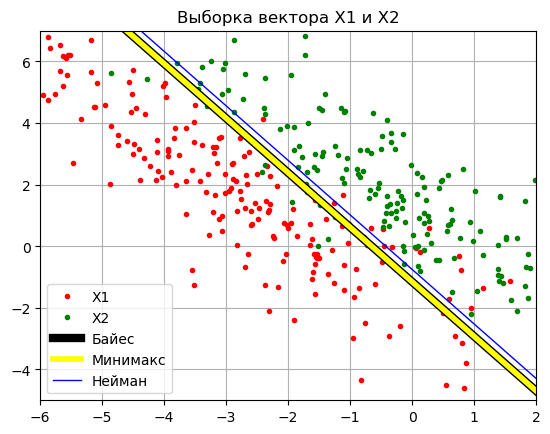

In [42]:
dir = "./vectors/"
M1 = np.load(dir + 'M_1.npy')
M2 = np.load(dir + 'M_2.npy')
B = np.load(dir + 'B.npy')

x1_1 = np.load(dir + 'x1_1.npy')
x1_2 = np.load(dir + 'x1_2.npy')

x = np.hstack((x1_1, x1_2))

x1, y_baies, a, b = classBaies(x, B, M1, M2)
x1, y_minimax = classMiniMax(x, B, M1, M2, 1)
x1, y_neiman, an, bn = classNeimanPirson(x, B, M1, M2, 0.05)

plt.plot(x1_1[0,:], x1_1[1,:], color='red', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x1_2[0,:], x1_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x1, y_baies[0], color='black', linewidth = 6)
plt.plot(x1, y_minimax[0], color='yellow', linewidth = 4)
plt.plot(x1, y_neiman[0], color='blue', linewidth =1)
plt.xlim(-6, 2)
plt.ylim(-5, 7)
plt.grid(True)

plt.legend(['X1', 'X2', 'Байес', 'Минимакс', 'Нейман'])
plt.title('Выборка вектора X1 и X2')



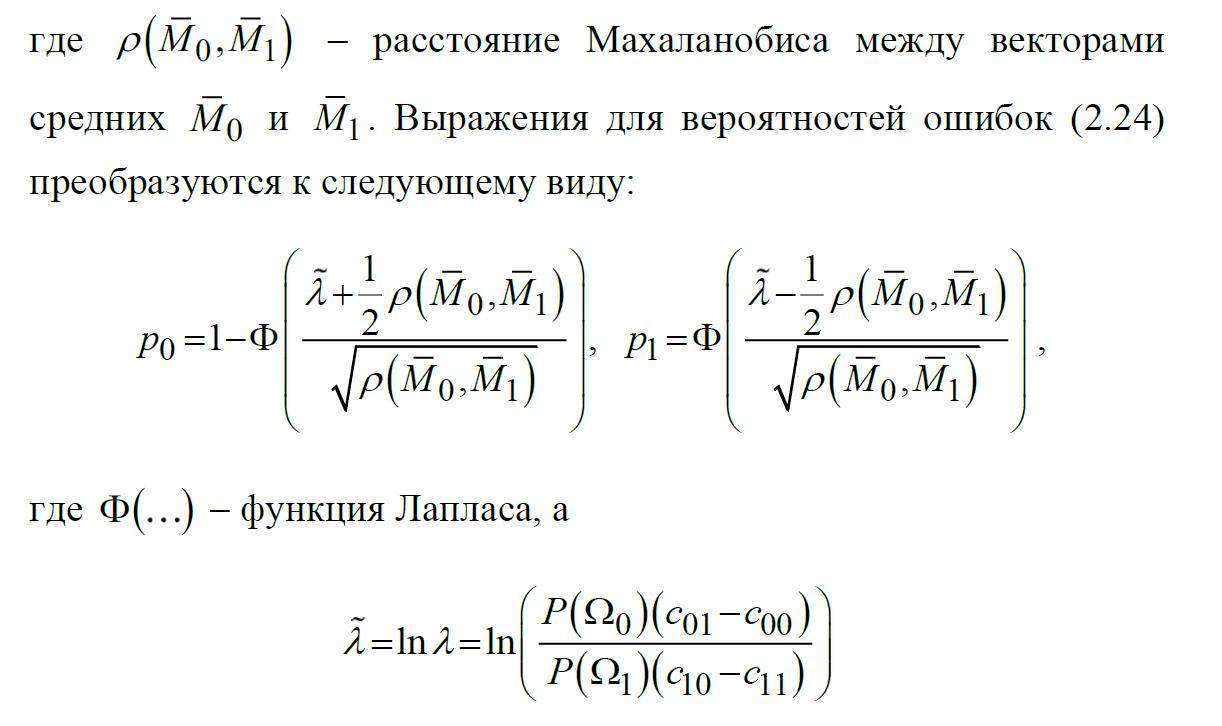

In [43]:
def calculate_theoric_error(M1, M2, B):
    ro = (M1 - M2).T @ np.linalg.inv(B) @ (M1 - M2)
    c = [[0, 1], [1, 0]]
    lamb = np.log((0.5*(c[0][1]-c[0][0]))/(0.5*(c[1][0]-c[1][1])))

    p0 = 1 - norm.cdf((lamb + 0.5 *ro)/np.sqrt(ro))[0][0]
    p1 = norm.cdf((lamb - 0.5 *ro)/np.sqrt(ro))[0][0]
    
    return p0, p1

In [44]:
p0, p1 = calculate_theoric_error(M1, M2, B)
print("\nОшибка первого рода = ", p0)
print("\nОшибка второго рода рода = ",p1)

p_sum = p0+p1
print("\nСуммарная ошибка = ", p_sum)


Ошибка первого рода =  0.08278985752050305

Ошибка второго рода рода =  0.08278985752050311

Суммарная ошибка =  0.16557971504100616


In [45]:
def calculate_error(v1, v2, a, b):
    p0_exp = 0
    p1_exp = 0
    for x, y in zip(v1[0], v1[1]):
        if y > -(a[0][0] * x + b) / a[0][1]:
            p0_exp += 1/len(v1[0])
            
    for x, y in zip(v2[0], v2[1]):
        if y < -(a[0][0] * x + b) / a[0][1]:
            p1_exp += 1/len(v2[0])
    
    return p0_exp, p1_exp

In [46]:
p0_exp, p1_exp = calculate_error(x1_1, x1_2, a, b)
print('Экспериментальная ошибка 1 рода = ', p0_exp)
print(f'Относительная погрешность ошибки 1 рода = {(np.abs(p0_exp-p0)*100/p0):.3f}%')

print('Экспериментальная ошибка 2 рода', p1_exp)
print(f'Относительная погрешность ошибки 2 рода = {(np.abs(p1_exp-p1)*100/p1):.3f}%')



Экспериментальная ошибка 1 рода =  0.09500000000000001
Относительная погрешность ошибки 1 рода = 14.748%
Экспериментальная ошибка 2 рода 0.08
Относительная погрешность ошибки 2 рода = 3.370%


In [47]:
p0_exp, p1_exp = calculate_error(x1_1, x1_2, an, bn)
print('Экспериментальная ошибка 1 рода = ', p0_exp)
print(f'Относительная погрешность ошибки 1 рода = {(np.abs(p0_exp-p0)*100/p0):.3f}%')

print('Экспериментальная ошибка 2 рода', p1_exp)
print(f'Относительная погрешность ошибки 2 рода = {(np.abs(p1_exp-p1)*100/p1):.3f}%')


Экспериментальная ошибка 1 рода =  0.06999999999999999
Относительная погрешность ошибки 1 рода = 15.449%
Экспериментальная ошибка 2 рода 0.11000000000000003
Относительная погрешность ошибки 2 рода = 32.867%


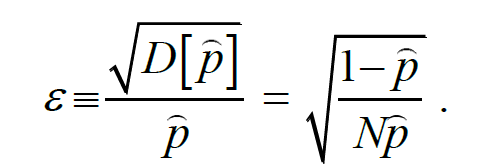

In [48]:
def errors(v0, v1, a, b):
    p0, p1 = calculate_error(v0, v1, a, b)

    err = (p0 + p1) / 2
    err_eps = np.sqrt((1 - err) / (len(v1[0])) * err)
    N_needed = int((1 - err) / (err * 0.05**2))

    return p0, p1, err_eps, N_needed

In [49]:
p_0, p_1, err_eps, N_needed = errors(x1_1, x1_2, a, b)
print('Ошибка 1 рода = ', p_0)
print('Ошибка 2 рода = ', p_1)
print('Эпсилон ошибки = ', err_eps)
print('Длина выборки = ', N_needed)

Ошибка 1 рода =  0.09500000000000001
Ошибка 2 рода =  0.08
Эпсилон ошибки =  0.019980459203932224
Длина выборки =  4171


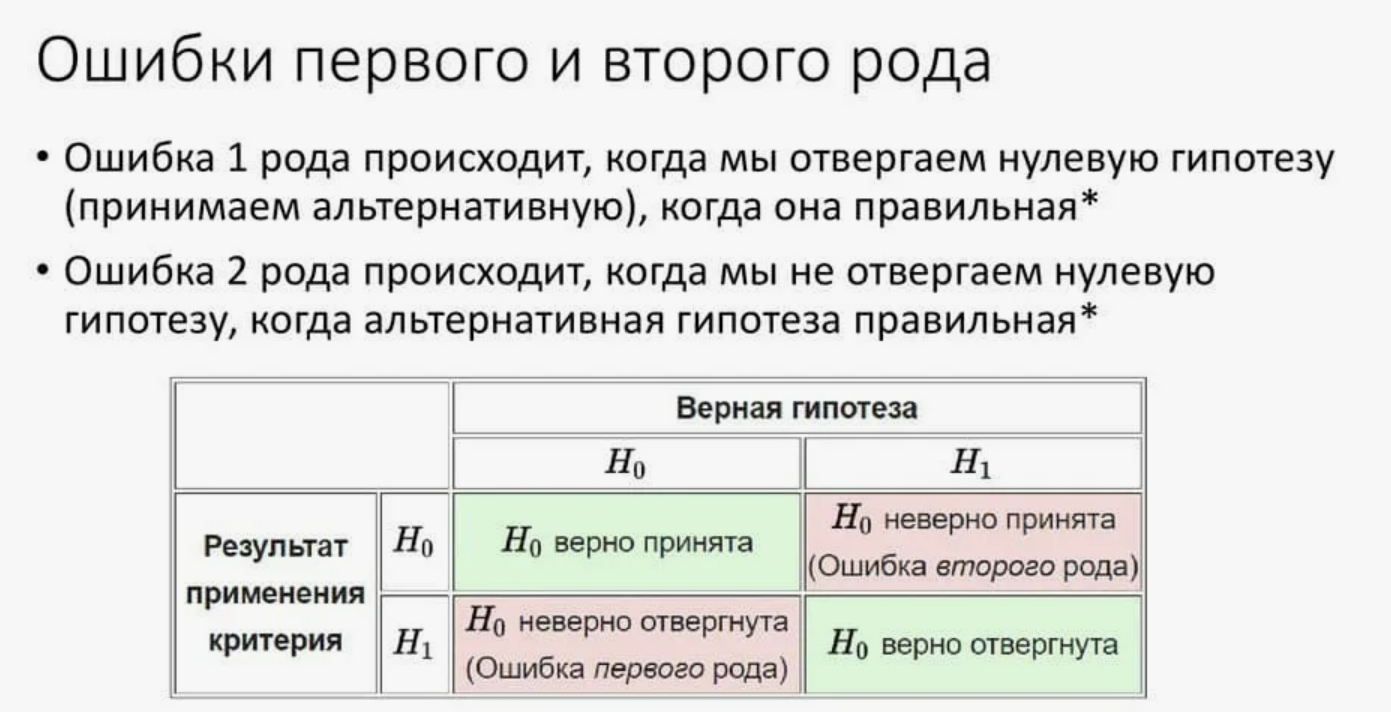

## Пункт 2

<br>Построить байесовскую решающую границу между классами
Q0 , Q1 и Q2 двумерных нормально распределенных векторов признаков для неравных корреляционных матриц и равных априорных вероятностей. Изобразить полученные решающие границы графически. Для любых двух классов оценить
экспериментально вероятности ошибочной классификации
в этом случае и определить относительную погрешность полученных оценок для заданного объема обучающей выборки
N. Определить объем обучающей выборки, обеспечивающий
получение оценок вероятностей ошибочной классификации
с погрешностью не более 5%.<br>

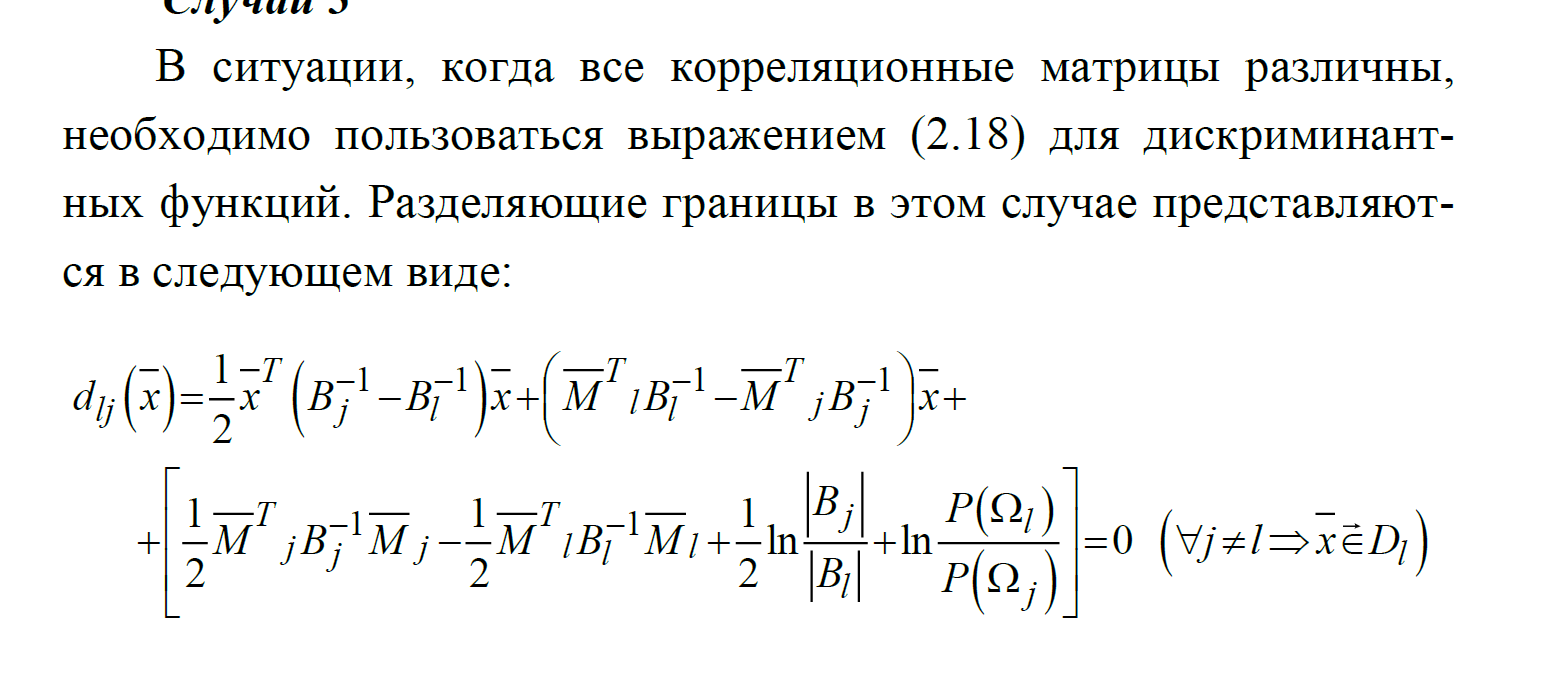

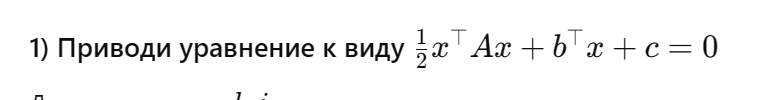

In [50]:
def classBaiesKvadratic(x, B1, B2, M1, M2,):
    """Граница байесовского классификатора для разных матриц ковариации"""
    # M1_T = M1.reshape(1, 2)
    # M2_T = M2.reshape(1, 2)

    B1_ = np.linalg.inv(B1)
    B2_ = np.linalg.inv(B2)

    det_B1 = np.linalg.det(B1)
    det_B2 = np.linalg.det(B2)

    A = 0.5 * (B2_ - B1_)
    b = M1.T @ B1_ - M2.T @ B2_
    c = (0.5 * (M2.T @ B2_ @ M2) - 0.5 * (M1.T @ B1_ @ M1) 
         + 0.5 * np.log(det_B2 / det_B1))

    coeff_y = (A[1][0] * x + A[0][1] * x + b[0][1]) / A[1][1]
    coeff_c = (A[0][0] * x * x + b[0][0] * x + c[0][0]) / A[1][1]

    D = np.power(coeff_y, 2) - 4 * 1 * coeff_c

    y1 = (- coeff_y[D >= 0] + np.sqrt(D[D >= 0])) / 2
    y2 = (- coeff_y[D >= 0] - np.sqrt(D[D >= 0])) / 2

    return x[D > 0], y1, y2

In [51]:
M1 = np.load(dir + 'M_1.npy')
M2 = np.load(dir + 'M_2.npy')
M3 = np.load(dir + 'M_3.npy')

B1 = np.load(dir + 'B_1.npy')
B2 = np.load(dir + 'B_2.npy')
B3 = np.load(dir + 'B_3.npy')

x2_1 = np.load(dir + 'x2_1.npy')
x2_2 = np.load(dir + 'x2_2.npy')
x2_3 = np.load(dir + 'x2_3.npy')

Text(0.5, 1.0, 'Выборка вектора X1 и X2')

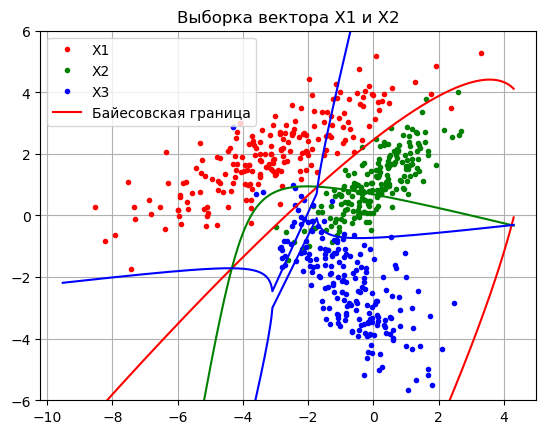

In [53]:
xlim = [min(min(x2_1[0]), min(x2_2[0]), min(x2_3[0])) - 1, max(max(x2_1[0]), max(x2_2[0]), max(x2_3[0])) + 1]
ylim = [min(min(x2_1[1]), min(x2_2[1]), min(x2_3[1])) - 1, max(max(x2_1[1]), max(x2_2[1]), max(x2_3[1])) + 1]
x = np.linspace(*xlim, 500)

x12, y12, d12 = classBaiesKvadratic(x, B1, B2, M1, M2)
#print(d12)
x13, y13, d13= classBaiesKvadratic(x, B1, B3, M1, M3)
x23, y23, d23 = classBaiesKvadratic(x, B2, B3, M2, M3)


plt.plot(x2_1[0,:], x2_1[1,:], color='red', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x2_2[0,:], x2_2[1,:], color='green', marker='.', linestyle='none')  # plot saved and loaded data
plt.plot(x2_3[0,:], x2_3[1,:], color='blue', marker='.', linestyle='none')  # plot saved and loaded data

# plt.plot(d12[:, 0], d12[:, 1], 'g.', markersize=2, label='Граница Ω0-Ω1')
# plt.plot(d13[:, 0], d13[:, 1], 'r.', markersize=2, label='Граница Ω0-Ω1')
# plt.plot(d23[:, 0], d23[:, 1], 'b.', markersize=2, label='Граница Ω0-Ω1')
plt.plot(x12, y12, color='red')
plt.plot(x12, d12, color='red')
# plt.plot(x13, y13, color='green')
plt.plot(x13, d13, color='green')
plt.plot(x23, y23, color='blue')
plt.plot(x23, d23, color='blue')

plt.ylim(-6, 6)
plt.grid(True)

plt.legend(['X1', 'X2', 'X3', 'Байесовская граница'])
plt.title('Выборка вектора X1 и X2')


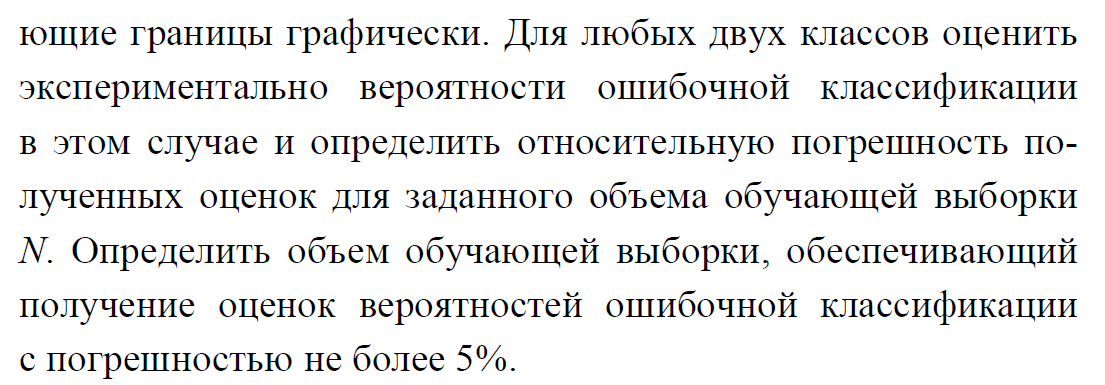